# Analysis and Prediction of Anxiety Levels Using Machine Learning Techniques

This project aims to analyze and predict anxiety levels in individuals using a dataset containing information on psychological traits, demographic factors, and anxiety scores. The main objective is to classify anxiety levels based on responses to a Generalized Anxiety Disorder (GAD) questionnaire and to explore the relationships between demographic factors and anxiety levels.

### Overview of Project Steps

1. **Importing Dependencies**:
   - Loading the necessary libraries for data analysis, visualization, and machine learning.

2. **Data Collection**:
   - Loading the dataset from a CSV file and displaying the first and last rows for an overview.

3. **Data Analysis**:
   - Describing the columns of the dataset and identifying relevant columns for anxiety analysis.

4. **Data Preprocessing**:
   - Removing irrelevant columns related to games.
   - Classifying anxiety levels based on the GAD score.
   - Handling missing values by filling numeric columns with the median and non-numeric columns with the mode.
   - Simplifying categories in the 'Work' and 'Degree' columns.

5. **Data Visualization**:
   - Creating graphs to visualize the distribution of ages and categorical columns.

6. **Label Encoding**:
   - Transforming categorical columns into numeric values using `LabelEncoder`.

7. **Data Splitting**:
   - Separating the data into features (X) and target (y).

8. **Model Selection**:
   - Evaluating several machine learning models (Random Forest, SVM, Gradient Boosting, etc.) using cross-validation to determine their accuracy.

9. **Hyperparameter Tuning**:
   - Using `GridSearchCV` to optimize the hyperparameters of the best models.

10. **Model Training**:
    - Splitting the data into training and testing sets, then training the SVM model with the best hyperparameters.

11. **Model Evaluation**:
    - Evaluating the model's performance on the training and testing sets using the confusion matrix and classification report.

12. **Predictive System**:
    - Developing a function to predict anxiety levels from new input data.

13. **ModelPipeline Class for Future Deployment**:
    - Creating a class to encapsulate the model and preprocessing steps, facilitating the deployment and use of the model in production environments.


Importing the Dependencies

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
import joblib

### **1. Data Collection**

In [76]:
df = pd.read_csv('anxiety.csv',encoding = 'ISO-8859-1')
pd.set_option('display.max_columns', None)

In [77]:
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [78]:
df.tail()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,6,6,5,5,6,Other,"Console (PS, Xbox, ...)",40.0,I play for fun,improving,NaN,NaN,10.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,Male,22,Student at college / university,Master (or equivalent),France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13460,14247,42057.81185,3,3,3,3,2,3,3,Extremely difficult,5,5,5,4,4,League of Legends,PC,20.0,I play for fun,winning,NaN,NaN,20.0,0.0,1.0,2.0,2.0,0.0,1.0,3.0,3.0,2.0,1.0,4.0,0.0,2.0,2.0,1.0,0.0,1.0,2.0,Female,20,Student at college / university,High school diploma (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,20,23,25.0,USA,USA
13461,14248,42058.16964,0,0,0,0,0,0,0,Not difficult at all,6,6,7,7,6,Starcraft 2,PC,20.0,I play for fun,having fun,Gold,NaN,14.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,Male,19,Student at college / university,High school diploma (or equivalent),Norway,Norway,Reddit,Multiplayer - online - with real life friends,Accept,0,32,10.0,NOR,NOR
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,2,6,3,2,3,Other,"Console (PS, Xbox, ...)",5.0,I play for fun,having fun,NaN,NaN,0.0,0.0,1.0,3.0,2.0,3.0,4.0,1.0,3.0,4.0,1.0,3.0,1.0,0.0,3.0,2.0,0.0,1.0,2.0,Female,18,Student at school,High school diploma (or equivalent),Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN
13463,14250,42058.36375,1,1,0,0,0,0,0,Somewhat difficult,5,6,5,3,6,Starcraft 2,PC,15.0,I play for fun,improving,Diamond,NaN,8.0,1.0,0.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,Male,19,Student at college / university,High school diploma (or equivalent),Canada,Canada,Reddit,Multiplayer - online - with strangers,Accept,2,25,14.0,CAN,CAN


In [79]:
df.shape

(13464, 55)

In [80]:
df.columns

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

#### About the dataset

This dataset is related to a study or survey gathering information about gaming habits, psychological traits, demographics, and life satisfaction. Here’s a breakdown of each column:

1.	S. No.: Serial number, just a record index.
2.	Timestamp: Likely a timestamp of when the data entry was recorded.
3.	GAD1 - GAD7: These could be responses to the Generalized Anxiety Disorder (GAD) questionnaire, which is used to measure levels of anxiety. GAD7 is a common 7-item scale.
o	Each GAD item could correspond to a question measuring different aspects of anxiety, with higher scores indicating more anxiety.
4.	GADE: This might be a summary or total score from the GAD1-7 responses.
5.	SWL1 - SWL5: These might be responses to the Satisfaction with Life (SWL) Scale, which is a 5-item scale measuring overall life satisfaction.
6.	Game: The name of the game played by the respondent (in this case, "Skyrim").
7.	Platform: The platform the game was played on (e.g., Console like PlayStation or Xbox).
8.	Hours: The number of hours the respondent spent playing the game (15 hours in this case).
9.	Earnings: How much money the respondent earned from gaming, likely in monetary terms (here, it's probably zero, as "I play for fun" is mentioned under whyplay).
10.	Whyplay: The respondent's reason for playing the game (here, "for fun").
11.	League: Could indicate if the respondent plays in a competitive gaming league (perhaps it's empty here because Skyrim is not a competitive game).
12.	Highestleague: The highest league achieved by the respondent (not applicable for non-competitive games).
13.	Streams: Possibly related to whether the respondent streams their gameplay (likely no, since Skyrim is typically a single-player game).
14.	SPIN1 - SPIN17: Likely responses to the Social Phobia Inventory (SPIN), which measures social anxiety. Each item could correspond to a different aspect of social anxiety.
15.	Narcissism: This could be a measure of narcissistic traits, likely from a personality inventory.
16.	Gender: The respondent's gender (Male in this case).
17.	Age: The respondent's age (25 years old).
18.	Work: The respondent’s employment status (Unemployed or between jobs).
19.	Degree: The respondent's highest educational degree (Bachelor's degree or equivalent).
20.	Birthplace: Country of birth (USA in this case).
21.	Residence: Country of residence (USA here too).
22.	Reference: How the respondent found the survey or study (Reddit in this case).
23.	Playstyle: The respondent's playstyle (Singleplayer for Skyrim).
24.	Accept: Whether the respondent accepts participation in the survey (Accept in this case).
25.	GAD_T: The total score for the GAD items (sum of GAD1 - GAD7).
26.	SWL_T: The total score for the SWL items (sum of SWL1 - SWL5).
27.	SPIN_T: The total score for the SPIN items (sum of SPIN1 - SPIN17).
28.	Residence_ISO3: ISO3 code for the respondent’s country of residence (USA, based on ISO 3166-1 alpha-3).
29.	Birthplace_ISO3: ISO3 code for the respondent’s country of birth (also USA in this case).


### **2. Data Analysis**

In this analysis, we are focusing on understanding psychological traits, specifically anxiety and social anxiety, in relation to demographic factors. This dataset contains various measures, including anxiety scores (Generalized Anxiety Disorder, GAD) and social anxiety scores (Social Phobia Inventory, SPIN), as well as responses related to life satisfaction (Satisfaction with Life Scale, SWL) and certain personality traits (e.g., narcissism). Additionally, the dataset includes demographic information such as age, gender, education level, and employment status, which will help us explore possible factors associated with psychological traits.

Although the dataset also contains data on gaming habits — such as time spent gaming, gaming platform, and motivations for playing — we are choosing to exclude these columns. This is because **our primary focus is on psychological and demographic factors** rather than on gaming behaviors. By removing gaming-related columns, we aim to streamline our analysis and ensure it remains centered on the predictors and traits most relevant to anxiety and social anxiety.

Our main objectives are:
- To analyze potential relationships between demographic factors and levels of anxiety and social anxiety.
- To identify which psychological or demographic factors might predict elevated anxiety levels, providing insight into patterns associated with these traits.


In [81]:
#columns related to gaming
columns_to_drop = [
    'S. No.','Timestamp','Game', 'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague', 'streams', 'Playstyle',
    'Birthplace', 'Residence', 'Residence_ISO3', 'Birthplace_ISO3','Reference','accept','SWL_T','SPIN_T'
]

df = df.drop(columns=columns_to_drop)



In [82]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,GAD_T
0,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),1
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),8
2,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),8
3,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),0
4,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),14


The Generalized Anxiety Disorder (GAD) questionnaire is specifically designed to measure the severity of anxiety. The GAD_T column represents the total score derived from responses to the individual items (GAD1 to GAD7). This score is a reliable and direct reflection of an individual’s anxiety level, making it the most appropriate feature for classifying anxiety.

#### Why Use GAD_T and Not Other Features?

 we aim to classify individuals based on their Generalized Anxiety Disorder (GAD) total score (GAD_T) into different anxiety levels. The goal is to simplify the analysis and make it easier to understand the distribution of anxiety levels among the participants.

#### but if GAD and GAD_T are enough to know the level of anxiety why I should use other features?

while GAD1-7 and GAD_T give a snapshot of anxiety levels, including other features allows you to analyze contributing factors, make predictions, and explore complex relationships, leading to richer insights.

In [83]:
# Function to classify anxiety levels based on the GAD total score
def classify_anxiety(gad_score):
    # If the GAD score is 4 or less, classify as 'Minimal anxiety'
    if gad_score <= 4:
        return 'Minimal anxiety'
    # If the GAD score is between 5 and 9, classify as 'Mild anxiety'
    elif 5 <= gad_score <= 9:
        return 'Mild anxiety'
    # If the GAD score is between 10 and 14, classify as 'Moderate anxiety'
    elif 10 <= gad_score <= 14:
        return 'Moderate anxiety'
    # If the GAD score is 15 or higher, classify as 'Severe anxiety'
    else:
        return 'Severe anxiety'

# Apply the classify_anxiety function to the 'GAD_T' column to create a new column 'Anxiety_Level'
df['Anxiety_Level'] = df['GAD_T'].apply(classify_anxiety)

# Display the first few rows of the dataframe with the new 'Anxiety_Level' column to visualize the result
df[['GAD_T', 'Anxiety_Level']].head()


,GAD_T,Anxiety_Level
0,1,Minimal anxiety
1,8,Mild anxiety
2,8,Mild anxiety
3,0,Minimal anxiety
4,14,Moderate anxiety


In [84]:
df = df.drop(columns=['GAD_T'])

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GAD1           13464 non-null  int64  
 1   GAD2           13464 non-null  int64  
 2   GAD3           13464 non-null  int64  
 3   GAD4           13464 non-null  int64  
 4   GAD5           13464 non-null  int64  
 5   GAD6           13464 non-null  int64  
 6   GAD7           13464 non-null  int64  
 7   GADE           12815 non-null  object 
 8   SWL1           13464 non-null  int64  
 9   SWL2           13464 non-null  int64  
 10  SWL3           13464 non-null  int64  
 11  SWL4           13464 non-null  int64  
 12  SWL5           13464 non-null  int64  
 13  SPIN1          13340 non-null  float64
 14  SPIN2          13310 non-null  float64
 15  SPIN3          13324 non-null  float64
 16  SPIN4          13305 non-null  float64
 17  SPIN5          13298 non-null  float64
 18  SPIN6 

In [86]:
#checking the number of missing values
df.isnull().sum()

GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
GADE              649
SWL1                0
SWL2                0
SWL3                0
SWL4                0
SWL5                0
SPIN1             124
SPIN2             154
SPIN3             140
SPIN4             159
SPIN5             166
SPIN6             156
SPIN7             138
SPIN8             144
SPIN9             158
SPIN10            160
SPIN11            187
SPIN12            168
SPIN13            187
SPIN14            156
SPIN15            147
SPIN16            147
SPIN17            175
Narcissism         23
Gender              0
Age                 0
Work               38
Degree           1577
Anxiety_Level       0
dtype: int64

#### Handling missing values

In [87]:
# Selecting numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

In [88]:
# Filling missing values in numeric columns with the median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [89]:
# Filling missing values in non-numeric columns with the mode
for col in non_numeric_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [90]:
# Checking that there are no remaining missing values
print(df.isnull().sum())

GAD1             0
GAD2             0
GAD3             0
GAD4             0
GAD5             0
GAD6             0
GAD7             0
GADE             0
SWL1             0
SWL2             0
SWL3             0
SWL4             0
SWL5             0
SPIN1            0
SPIN2            0
SPIN3            0
SPIN4            0
SPIN5            0
SPIN6            0
SPIN7            0
SPIN8            0
SPIN9            0
SPIN10           0
SPIN11           0
SPIN12           0
SPIN13           0
SPIN14           0
SPIN15           0
SPIN16           0
SPIN17           0
Narcissism       0
Gender           0
Age              0
Work             0
Degree           0
Anxiety_Level    0
dtype: int64

In [91]:
# Displaying the values for each feature
for column in df.columns:
    if column != 'Age':  # Exclude 'Age' from the loop
      print(f"Feature: {column}")
      print("-" * 20)
      print(df[column].value_counts())
      print("-" * 20)
      print("\n")

Feature: GAD1
--------------------
GAD1
0    5694
1    5099
2    1520
3    1151
Name: count, dtype: int64
--------------------


Feature: GAD2
--------------------
GAD2
0    7616
1    3576
2    1326
3     946
Name: count, dtype: int64
--------------------


Feature: GAD3
--------------------
GAD3
0    5319
1    4708
2    2016
3    1421
Name: count, dtype: int64
--------------------


Feature: GAD4
--------------------
GAD4
0    7129
1    3884
2    1488
3     963
Name: count, dtype: int64
--------------------


Feature: GAD5
--------------------
GAD5
0    9236
1    2576
2     961
3     691
Name: count, dtype: int64
--------------------


Feature: GAD6
--------------------
GAD6
0    5386
1    4993
2    1982
3    1103
Name: count, dtype: int64
--------------------


Feature: GAD7
--------------------
GAD7
0    8444
1    2961
2    1211
3     848
Name: count, dtype: int64
--------------------


Feature: GADE
--------------------
GADE
Not difficult at all    6885
Somewhat difficult      5148

In [92]:
# Simplify categories in the 'Work' column
df['Work'] = df['Work'].replace({
    'Student at college / university': 'Student',
    'Student at school': 'Student',
    'Employed': 'Employed',
    'Unemployed / between jobs': 'Unemployed'
})

In [93]:
# Simplify categories in the 'Degree' column
# Convert all entries in 'Degree' to lowercase for consistency
df['Degree'] = df['Degree'].str.lower()

# Get the most common values in the 'Degree' column
degree_counts = df['Degree'].value_counts()

# Identify the common patterns in the column and map them to broader categories
df['Degree'] = df['Degree'].replace({
    degree_counts[degree_counts.index.str.contains('high school')].index[0]: 'High School',
    degree_counts[degree_counts.index.str.contains('bachelor')].index[0]: 'Bachelor',
    degree_counts[degree_counts.index.str.contains('master')].index[0]: 'Master',
    degree_counts[degree_counts.index.str.contains('ph.d|psy.d|md')].index[0]: 'Doctorate'
})

In [94]:
# Check the transformed data to verify changes
print("Transformed 'Work' column:\n", df['Work'].value_counts())
print("\nTransformed 'Degree' column:\n", df['Degree'].value_counts())


Transformed 'Work' column:
 Work
Student       9340
Employed      2734
Unemployed    1390
Name: count, dtype: int64

Transformed 'Degree' column:
 Degree
High School    10137
Bachelor        2687
Master           546
Doctorate         94
Name: count, dtype: int64


#### Handling Imbalanced Dataset with Class Weights



In [95]:
df['Anxiety_Level'].value_counts()

Anxiety_Level
Minimal anxiety     7446
Mild anxiety        3666
Moderate anxiety    1613
Severe anxiety       739
Name: count, dtype: int64

In this analysis, we are dealing with an **imbalanced dataset**, where certain classes have significantly fewer instances than others. This imbalance can negatively impact the performance of machine learning models, as they tend to favor the majority class, leading to biased predictions.

To address this, we will use the **class weight** method. Class weighting is a technique where the model assigns a higher weight to the under-represented classes during training, ensuring that the model places more importance on these classes when making predictions. This helps to counteract the bias towards the majority class and improve the model's ability to correctly classify instances of the minority class.

We will only use models that support class weights, including:

- **Random Forest**
- **Logistic Regression**
- **Support Vector Machines (SVM)**
- **Gradient Boosting (e.g., XGBoost, LightGBM)**
- **Decision Trees**
- **Neural Networks (e.g., MLPClassifier)**

By using this approach, we aim to create a more robust model that performs well on both the majority and minority classes, leading to more accurate and fair predictions.

### **3. Data Visualization**

#### Visualizing the distribution for numerical column

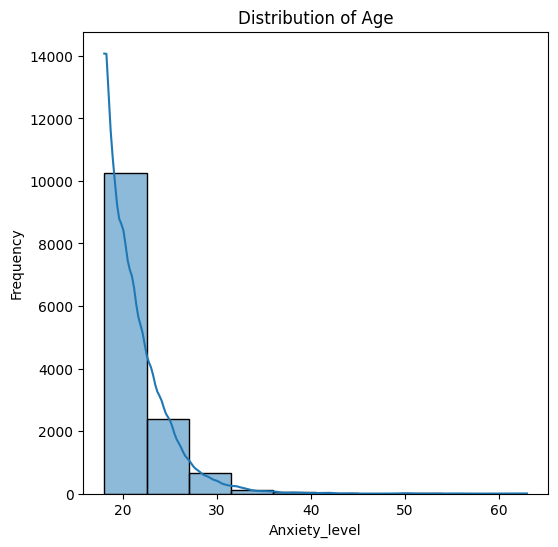

In [96]:
plt.figure(figsize=(6, 6))  # Set the figure size
sns.histplot(df['Age'], kde=True, bins=10)  # Plot histogram with KDE
plt.title(f'Distribution of Age')  # Set the title of the plot
plt.xlabel(column.capitalize())  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label


# Display the plots
plt.show()


#### Visualizing the distribution for categorical columns

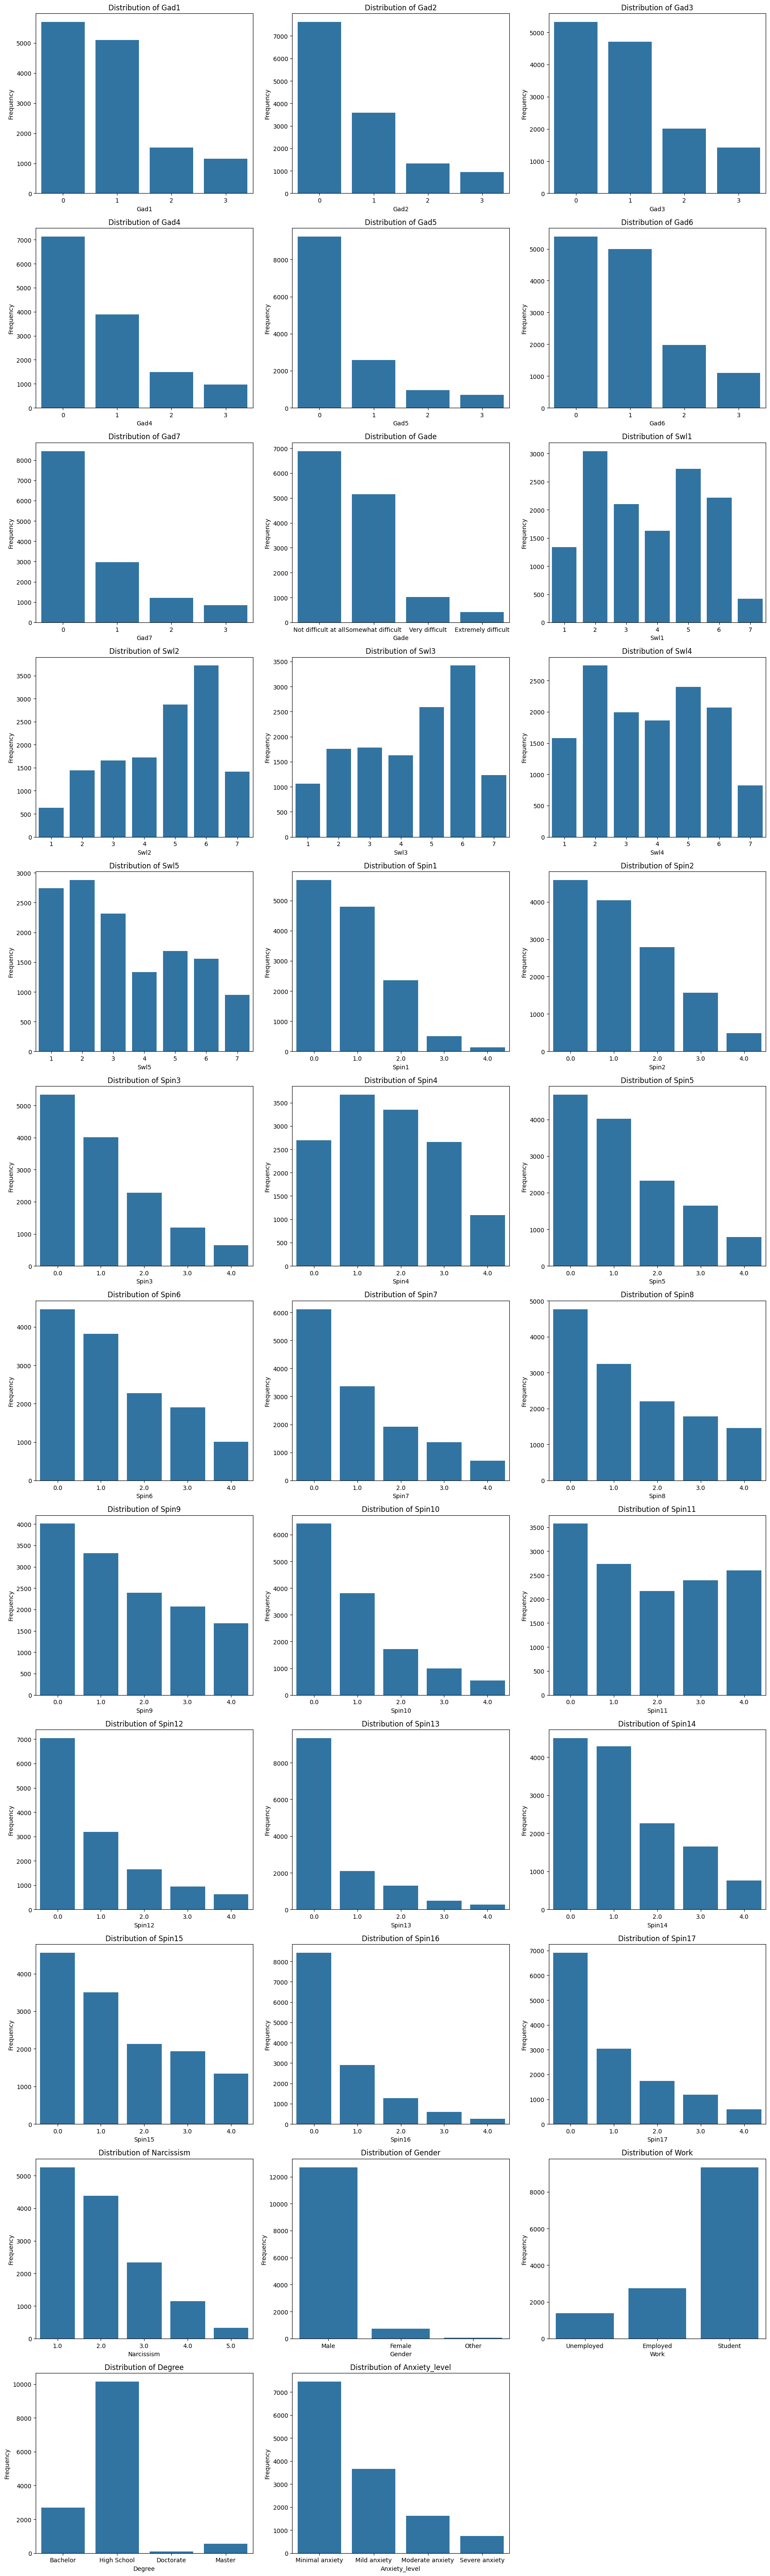

In [97]:
columns_to_plot = [col for col in df.columns if col != 'Age']  # Modify threshold as needed

# Determine the number of rows needed for the subplot grid
num_columns = len(columns_to_plot)
num_rows = num_columns // 3 + (num_columns % 3 > 0)  # Calculate number of rows, accounting for any remainder

# Set up the figure size based on the number of rows
plt.figure(figsize=(18, 5 * num_rows))  # Adjust figure height to accommodate all subplots

# Create subplots for each column in columns_to_plot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(num_rows, 3, i)  # Create a subplot in the grid
    sns.countplot(x=column, data=df)  # Plot count plot for categorical data
    plt.title(f'Distribution of {column.capitalize()}')  # Set the title of the plot
    plt.xlabel(column.capitalize())  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
# Display the plots
plt.show()


### **3. Data Preprocessing**

Label Encoding

In [98]:
# Initialize a LabelEncoder object to convert categorical labels into numeric values
label_encoder = LabelEncoder()

In [99]:
df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Anxiety_Level'],
      dtype='object')

In [100]:
columns_need_encoding = ['GADE','Gender', 'Work', 'Degree','Anxiety_Level']

In [101]:
# Initialize an empty dictionary to keep track of the label encoding mappings
tracker = {}

# Iterate over the columns that need encoding
for column in columns_need_encoding:
    # Apply LabelEncoder to the column and transform categorical values to numeric
    df[column] = label_encoder.fit_transform(df[column])

    # Store the mapping of original labels to encoded values in the tracker dictionary
    tracker[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [102]:
# Printing the label encoding mappings for each column
for column, values in tracker.items():
    # Display the column name and its corresponding label encoding mapping
    print(f"{column} : {values}")

GADE : {'Extremely difficult': np.int64(0), 'Not difficult at all': np.int64(1), 'Somewhat difficult': np.int64(2), 'Very difficult': np.int64(3)}
Gender : {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Work : {'Employed': np.int64(0), 'Student': np.int64(1), 'Unemployed': np.int64(2)}
Degree : {'Bachelor': np.int64(0), 'Doctorate': np.int64(1), 'High School': np.int64(2), 'Master': np.int64(3)}
Anxiety_Level : {'Mild anxiety': np.int64(0), 'Minimal anxiety': np.int64(1), 'Moderate anxiety': np.int64(2), 'Severe anxiety': np.int64(3)}


In [103]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Anxiety_Level
0,0,0,0,0,1,0,0,1,3,5,5,5,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,25,2,0,1
1,1,2,2,2,0,1,0,2,3,5,2,5,1,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,1,41,2,0,0
2,0,2,2,0,0,3,1,1,2,6,5,2,2,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,0,32,0,0,0
3,0,0,0,0,0,0,0,1,2,5,5,3,2,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,28,0,0,1
4,2,1,2,2,2,3,2,3,2,2,4,5,1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,19,0,2,2


### **4. Data splitting**

In [104]:
#splitting the data into features and target
X = df.drop(columns=['Anxiety_Level'])
y = df['Anxiety_Level']

### **5. Model Selection**

#### Model Selection using Cross-Validation:

In [105]:
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(),
}

In [106]:
# Initialize an empty dictionary to store the cross-validation results
cv_results = {}

# Perform cross-validation on each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[model_name] = cv_score
    print(f"{model_name} mean accuracy: {np.mean(cv_score):.4f}\n")

Evaluating Random Forest...
Random Forest mean accuracy: 0.9325

Evaluating SVM...
SVM mean accuracy: 0.9698

Evaluating Gradient Boosting...
Gradient Boosting mean accuracy: 0.9752

Evaluating Decision Tree...
Decision Tree mean accuracy: 0.9028

Evaluating KNN...
KNN mean accuracy: 0.7551



Summary:
* Best Performers: Gradient Boosting (97.52%), SVM (96.98%) and Random Forest (93.25%) are the top three models based on mean accuracy.
* Good Performance: Decision Tree (90.28%) shows strong performance, but not as high as the top three.
* Lower Performance: KNN (75.51%) lag behind in terms of accuracy, with KNN showing the lowest performance overall.

#### Hyperparameter Tuning using GridSearchCV for the best performing model based on cross-validation accuracy :

In [107]:
# Defining the models
models = [SVC(class_weight='balanced', random_state=42),
          GradientBoostingClassifier(random_state=42),
          RandomForestClassifier(class_weight='balanced', random_state=42)]

In [108]:
# Defining the hyperparameter grid for each model
model_hyperparameters = {
    'SVC': {
        'C': [1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'GradientBoostingClassifier': {
        'n_estimators': [200, 300],
        'learning_rate': [0.01, 0.1],
        'max_depth': [None, 5]
    },
    'RandomForestClassifier': {
        'n_estimators': [200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [5, 10]
    }
}

In [109]:
# Initialize an empty list to store results
results = []

# Perform GridSearchCV for each model
for i in range(len(models)):
    model = models[i]
    model_name = model.__class__.__name__  # Get the model name
    params = model_hyperparameters[model_name]  # Get the hyperparameter grid for the model

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')

    # Fit GridSearchCV to the data
    grid_search.fit(X, y)  # Replace X and y with your feature and target variables

    # Store results in a dictionary
    results.append({
        'model': model_name,
        'best accuracy score': grid_search.best_score_,
        'best parameters': grid_search.best_params_
    })

# Convert the results into a DataFrame for better visualization
df_result = pd.DataFrame(results, columns=['model', 'best accuracy score', 'best parameters'])


In [110]:
# Display the results
for i in range(df_result.shape[0]):
    print(f"{df_result['model'][i]}: Best Accuracy: {df_result['best accuracy score'][i]:.4f}, Best Parameters: {df_result['best parameters'][i]}")

SVC: Best Accuracy: 0.9987, Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
GradientBoostingClassifier: Best Accuracy: 0.9816, Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
RandomForestClassifier: Best Accuracy: 0.9413, Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


### **6. Model Training :**

In [111]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [112]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(10771, 35) (2693, 35) (10771,) (2693,)


In [113]:
classifier = SVC(C=10, kernel='rbf', gamma='scale', class_weight='balanced', random_state=42)

In [114]:
classifier.fit(X_train,Y_train)

SVC(C=10, class_weight='balanced', random_state=42)

### **7. Model Evaluation**

Evaluation on training data

In [115]:
y_true = Y_train
y_pred = classifier.predict(X_train)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred)


In [116]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2933
           1       1.00      1.00      1.00      5957
           2       1.00      1.00      1.00      1290
           3       1.00      1.00      1.00       591

    accuracy                           1.00     10771
   macro avg       1.00      1.00      1.00     10771
weighted avg       1.00      1.00      1.00     10771



Text(0.5, 23.52222222222222, 'predicted label')

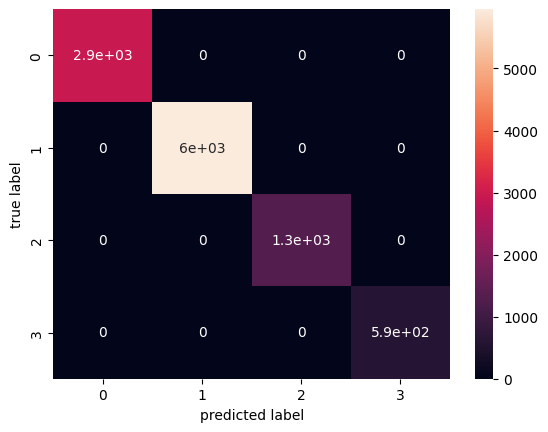

In [117]:
plt.figure()
sns.heatmap(cm, annot=True)
plt.ylabel('true label')
plt.xlabel('predicted label')

Evaluation on test data

In [118]:
y_true = Y_test
y_pred = classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Classification Report
report = classification_report(y_true, y_pred)

In [119]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       733
           1       1.00      1.00      1.00      1489
           2       1.00      1.00      1.00       323
           3       1.00      1.00      1.00       148

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693



Text(0.5, 23.52222222222222, 'predicted label')

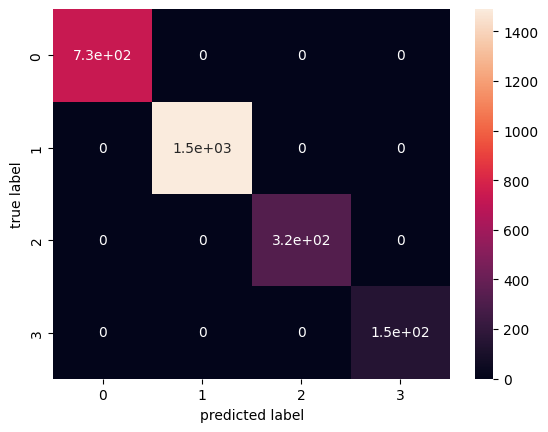

In [120]:
plt.figure()
sns.heatmap(cm, annot=True)
plt.ylabel('true label')
plt.xlabel('predicted label')

### **8. Predictive System**

In [146]:
def predict_anxiety_level(input_data, tracker):
    # Convert the input data to a NumPy array
    input_data_as_numpy_array = np.asarray(input_data)
    print(input_data_as_numpy_array)

    # Reshape the array to ensure it has one row and multiple columns (required for model input)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    print(input_data_reshaped)
    
    # Create a DataFrame from the reshaped array with specified column names
    df_input_data = pd.DataFrame(input_data_reshaped, columns=['GAD1', 'GAD2', 'GAD3', 'GAD4',
       'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree'])
    print(df_input_data)
    
    # List of columns that require encoding
    columns_need_encoding = ['GADE','Gender', 'Work', 'Degree']

    # Encode categorical columns using the provided tracker
    for column in columns_need_encoding:
        if column in tracker:
            df_input_data[column] = df_input_data[column].apply(
                lambda x: tracker[column].get(x, x)  # Map values using tracker or keep unchanged
            )
    
    print(df_input_data)

    # Make prediction using the pre-trained classifier
    prediction = classifier.predict(df_input_data)
    print(f"Predicted anxiety level: {prediction[0]}")
    
    # Reverse mapping for decoding the predicted numeric value to its original category
    anxiety_level = {v: k for k, v in tracker['Anxiety_Level'].items()}

    # Get the result by decoding the prediction
    result = anxiety_level[prediction[0]]

    return result

### **9. ModelPipeline Class for Future Deployment**

The ModelPipeline class is designed to streamline the deployment of machine learning models in production environments. It encapsulates the model, data preprocessing steps, and encoders into a single, reusable object. This class includes methods for making predictions, saving the pipeline to a file, and loading it back when needed.

In [148]:
class ModelPipeline:
    def __init__(self, model, tracker):
        """
        Initialize the ModelPipeline with a model and tracker.

        Parameters:
        - model: The pre-trained machine learning model for making predictions.
        - tracker: Dictionary used for encoding categorical variables.
        
        """
        self.model = model
        
        self.tracker = tracker

    def predict_anxiety_level(self,input_data):
        # Convert the input data to a NumPy array
        input_data_as_numpy_array = np.asarray(input_data)
        print(input_data_as_numpy_array)

        # Reshape the array to ensure it has one row and multiple columns (required for model input)
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
        print(input_data_reshaped)
        
        # Create a DataFrame from the reshaped array with specified column names
        df_input_data = pd.DataFrame(input_data_reshaped, columns=['GAD1', 'GAD2', 'GAD3', 'GAD4',
        'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
        'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
        'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
        'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
        'Narcissism', 'Gender', 'Age', 'Work', 'Degree'])
        print(df_input_data)
        
        # List of columns that require encoding
        columns_need_encoding = ['GADE','Gender', 'Work', 'Degree']

        # Encode categorical columns using the provided tracker
        for column in columns_need_encoding:
            if column in tracker:
                df_input_data[column] = df_input_data[column].apply(
                    lambda x: tracker[column].get(x, x)  # Map values using tracker or keep unchanged
                )
        
        print(df_input_data)

        # Make prediction using the pre-trained classifier
        prediction = classifier.predict(df_input_data)
        print(f"Predicted anxiety level: {prediction[0]}")
        
        # Reverse mapping for decoding the predicted numeric value to its original category
        anxiety_level = {v: k for k, v in tracker['Anxiety_Level'].items()}

        # Get the result by decoding the prediction
        result = anxiety_level[prediction[0]]

        return result

    def save(self, filename):
        """
        Save the ModelPipeline instance to a file.

        Parameters:
        - filename: The name of the file where the pipeline will be saved.
        """
        with open(filename, 'wb') as file:
            joblib.dump(self, file)

    def load(filename):
        """
        Load a ModelPipeline instance from a file.

        Parameters:
        - filename: The name of the file from which the pipeline will be loaded.

        Returns:
        - An instance of the ModelPipeline class.
        """
        with open(filename, 'rb') as file:
            return joblib.load(file)


In [149]:
#creating an instance
model = ModelPipeline(classifier,tracker)

In [153]:
# Save the trained pipeline
model.save('model_pipeline.pkl')